# Ejercicio 3

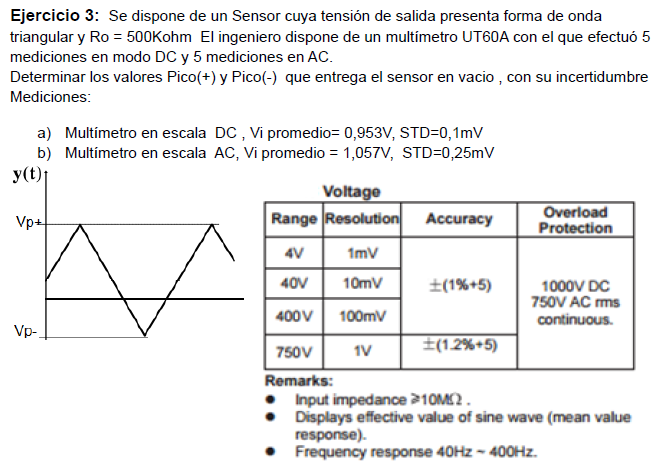

Para calcular el valor del pico positivo: 

$ V_{p+} = V_{rms} \sqrt{2} + V_{avg}  $

Para calcular el valor del pico negativo: 

$ V_{p-} = -V_{rms} \sqrt{2} + V_{avg}  $

In [1]:
import numpy as np

## Estudio Tipo A

In [2]:
# INCERTIDUMBRE TIPO A
n = 5

Vavg_ui = 0.1e-3/np.sqrt(n) 
Vrms_ui = 0.25e-3/np.sqrt(n)

print("Incertidumbre tipo A de valor medio (continua):     Vavg_ui = %0.8f" %Vavg_ui)
print("Incertidumbre tipo A de valor eficaz (alterna):     Vrms_ui = %0.8f" %Vrms_ui)

Incertidumbre tipo A de valor medio (continua):     Vavg_ui = 0.00004472
Incertidumbre tipo A de valor eficaz (alterna):     Vrms_ui = 0.00011180


## Estudio Tipo B

In [3]:
# INCERTIDUMBRE TIPO B

Vavg_mean = 0.953
Vrms_mean = 1.057

# Usamos rango de 4V --> Resolucion: 1mV    +/-(1%+5)
resolucion = 1e-3
digitos = 5

error_avg = (1/100) * Vavg_mean + digitos*resolucion 
error_rms = (1/100) * Vrms_mean + digitos*resolucion 

#Asumiendo distribución uniforme (rectangular):
Vavg_uj = error_avg / np.sqrt(3)
Vrms_uj = error_rms / np.sqrt(3)

print("Incertidumbre tipo B de valor medio (continua):     Vavg_uj = %0.8f" %Vavg_uj)
print("Incertidumbre tipo B de valor eficaz (alterna):     Vrms_uj = %0.8f" %Vrms_uj)

Incertidumbre tipo B de valor medio (continua):     Vavg_uj = 0.00838890
Incertidumbre tipo B de valor eficaz (alterna):     Vrms_uj = 0.00898934


## Incertidumbre combinada

In [4]:
# INCERTIDUMBRE COMBINADA
Vavg_uc = np.sqrt(Vavg_ui**2 + Vavg_uj**2)
Vrms_uc = np.sqrt(Vrms_ui**2 + Vrms_uj**2)

print("Incertidumbre combinada de valor medio (continua):     Vavg_uc = %0.8f" %Vavg_uc)
print("Incertidumbre combinada de valor eficaz (alterna):     Vrms_uc = %0.8f" %Vrms_uc)

Incertidumbre combinada de valor medio (continua):     Vavg_uc = 0.00838902
Incertidumbre combinada de valor eficaz (alterna):     Vrms_uc = 0.00899004


In [5]:
# GRADOS DE LIBERTAD
Veff_avg = Vavg_uc**4 * (n-1) / (Vavg_ui**4)
Veff_rms = Vrms_uc**4 * (n-1) / (Vrms_ui**4)

print("Grados de libertad de Vavg:  %d" % Veff_avg)
print("Grados de libertad de Vrms:  %d" % Veff_rms)

Grados de libertad de Vavg:  4952729767
Grados de libertad de Vrms:  167219243


## Semirango

Viendo que los grados de libertad dan un valor muy elevado, y que la incertidumbre tipo B es mucho mayor que la incertidumbre tipo A (187 veces mayor en avg y 80 veces mayor en rms), podemos asumir que domina la distribución tipo B, por lo que concluimos que ambas incertidumbres tienen distribución uniforme --> Para tener el semirango y poder compararlas con el error de método, multiplicamos por $\sqrt{3}$.

In [6]:
Delta_avg = Vavg_uc * np.sqrt(3)
Delta_rms = Vrms_uc * np.sqrt(3)

Err_avg = Delta_avg / Vavg_mean 
Err_rms = Delta_rms / Vrms_mean 

print("Delta avg = %0.8f" %Delta_avg)
print("Delta rms = %0.8f" %Delta_rms)
print("Err_avg = %0.8f" %Err_avg)
print("Err_rms = %0.8f" %Err_rms)

Delta avg = 0.01453021
Delta rms = 0.01557120
Err_avg = 0.01524681
Err_rms = 0.01473151


## Error de método

In [7]:
Ro = 500e3
Rv = 10e6

Em = Rv/(Rv+Ro) - 1

print("Error de método: %0.8f" %Em)

Error de método: -0.04761905


## Comparación error de método con semirango

Vemos que el error de método es mayor que el semirango (en módulo), por lo cual hay que corregir.

In [8]:
Vavg_ok = Vavg_mean/(1+Em)
Vrms_ok = Vrms_mean/(1+Em)

print("Vavg corregida: %0.8f" %Vavg_ok)
print("Vrms corregida: %0.8f" %Vrms_ok)

Vavg corregida: 1.00065000
Vrms corregida: 1.10985000


In [9]:
# INCERTIDUMBRES COMBINADAS CORREGIDAS 

# Recalculo teniendo en cuenta la derivada de la corregida con respecto a la no corregida

dVavgOk_dVavgMean = 1/(1+Em) 
Vavg_ok_uc = np.sqrt(dVavgOk_dVavgMean**2 * Vavg_uc**2)

dVrmsOk_dVrmsMean = 1/(1+Em) 
Vrms_ok_uc = np.sqrt(dVrmsOk_dVrmsMean**2 * Vrms_uc**2)

print("Incertidumbre combinada de valor medio corregida (continua):     Vavg_uc = %0.8f" %Vavg_ok_uc)
print("Incertidumbre combinada de valor eficaz corregida (alterna):     Vrms_uc = %0.8f" %Vrms_ok_uc)

Incertidumbre combinada de valor medio corregida (continua):     Vavg_uc = 0.00880847
Incertidumbre combinada de valor eficaz corregida (alterna):     Vrms_uc = 0.00943954


Como la correción del error de método es simplemente multiplicar por una constante, la distribución de la incertidumbre combinada de los valores corregidos sigue siendo uniforme, por lo que no hace falta recalcular los grados de libertad.

# Cálculo valores picos

In [10]:
Vp_pos = Vrms_ok * np.sqrt(2) + Vavg_ok
Vp_neg = -Vrms_ok * np.sqrt(2) + Vavg_ok

print("Valor pico positivo = %0.8f" %Vp_pos)
print("Valor pico negativo = %0.8f" %Vp_neg)

Valor pico positivo = 2.57021492
Valor pico negativo = -0.56891492


In [11]:
# INCERTIDUMBRES COMBINADAS de valores picos

dVpPos_dVrms_ok = np.sqrt(2)
dVpPos_dVavg_ok = 1

dVpNeg_dVrms_ok = -np.sqrt(2)
dVpNeg_dVavg_ok = 1

Vpos_uc = np.sqrt((dVpPos_dVrms_ok * Vrms_ok_uc)**2 + (dVpPos_dVavg_ok * Vavg_ok_uc )**2)  
Vneg_uc = np.sqrt((dVpNeg_dVrms_ok * Vrms_ok_uc)**2 + (dVpNeg_dVavg_ok * Vavg_ok_uc )**2)  

print("Incertidumbre combinada valor pico positivo: %0.8f" %Vpos_uc)
print("Incertidumbre combinada valor pico negativo: %0.8f" %Vneg_uc)

Incertidumbre combinada valor pico positivo: 0.01599372
Incertidumbre combinada valor pico negativo: 0.01599372


Al ser los grados efectivos de libertad tan elevados, y ser la incertidumbre tipo B mucho mayor que la incertidumbre tipo A (tanto en avg como en rms) podemos asumir que la distribución de los valores picos de tensión va a ser tipo B (uniforme). Por esto, para determinar el coeficiente de expansión, usamos la siguiente tabla, la cual nos brinda K para un 95% de cobertura al convolucionar dos rectangulares:

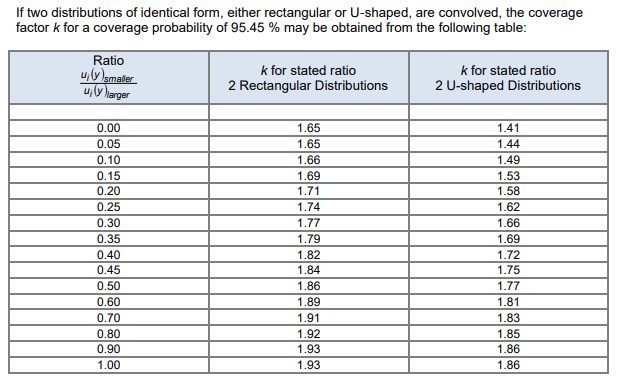

In [12]:
Ratio = Vavg_ok_uc/Vrms_ok_uc

print("Ratio = %0.8f" %Ratio)

Ratio = 0.93314597


Viendo la tabla:  k=1.93

In [13]:
# INCERTIDUMBRES COMBINADAS EXPANDIDAS de valores picos
k = 1.93

Vpos_uc_exp = Vpos_uc * k
Vneg_uc_exp = Vneg_uc * k

## Conclusión

In [14]:
print("Valor pico positivo =  %0.3f +- %0.3f @ 95.45%% confianza (K = 1.93)" %(Vp_pos, Vpos_uc_exp))
print("Valor pico negativo = %0.3f +- %0.3f @ 95.45%% confianza (K = 1.93)" %(Vp_neg, Vneg_uc_exp))

Valor pico positivo =  2.570 +- 0.031 @ 95.45% confianza (K = 1.93)
Valor pico negativo = -0.569 +- 0.031 @ 95.45% confianza (K = 1.93)
